Stock Market Analysis: Tesla, GM, and Ford

This project aims to analyze and compare the stock performance of three major American automakers: Tesla, General Motors (GM), and Ford. The analysis utilizes historical stock data retrieved from Yahoo Finance, focusing on key metrics such as:

Stock Prices: Visualization of historical stock price trends for each company.
Opening Prices: Comparison of opening prices over time.
Volume Traded: Analysis of trading volume and potential interpretations.
Market Capitalization: Examination of market cap to gauge company size and value.
Moving Averages: Calculation and visualization of moving averages to identify trends.
Correlation & Scatter Matrix: Assessment of relationships between the stocks.
Daily Percentage Change: Calculation and analysis of daily price fluctuations.
Volatility: Measurement and comparison of stock price volatility.
Box Plots: Visualization of price distributions and potential outliers.
Cumulative Return: Calculation of overall returns for each stock over the analyzed period.
Through this comprehensive analysis, we aim to gain insights into the performance and dynamics of these automakers in the stock market, potentially informing investment decisions or identifying interesting trends in the automotive industry.

Please note that this analysis is for informational purposes only and should not be considered financial advice.

Data Source: Yahoo Finance

Tools Used: Python, Pandas, Jupyter Notebook

Analysis Period: Jan 1, 2018 - Sept 1, 2024


Import Libraties into Pandas

In [181]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import numpy as np
%matplotlib inline



In [182]:
start = datetime.datetime(2018,1,1)
end   = datetime.datetime(2024,9,1)

Importing Stock Prices into Python

In [183]:
tesla = yf.download("TSLA", start=start, end=end)
ford  = yf.download("F", start=start, end=end)
gm    = yf.download("GM", start=start, end=end)

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Converting to CSV Files

In [184]:
tesla.to_csv('Tesla_Stock.csv')
ford.to_csv('Ford_Stock.csv')
gm.to_csv('GM_Stock.csv')

In [185]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000


In [186]:
ford.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,12.52,12.66,12.50,12.66,8.995987,20773300
2018-01-03,12.68,12.80,12.67,12.76,9.067048,29765600
2018-01-04,12.78,13.04,12.77,12.98,9.223374,37478200
2018-01-05,13.06,13.22,13.04,13.20,9.379702,46121900
2018-01-08,13.21,13.22,13.11,13.15,9.344173,33828300


In [187]:
gm.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,41.240002,41.869999,41.150002,41.799999,37.197289,6934600
2018-01-03,42.209999,42.950001,42.200001,42.820000,38.104973,14591600
2018-01-04,43.090000,44.250000,43.009998,44.139999,39.279629,17298700
2018-01-05,44.500000,44.639999,43.959999,44.009998,39.163940,9643300
2018-01-08,44.040001,44.590000,43.520000,44.220001,39.350815,13099600


Stock Prices for TESLA, GM AND FORD

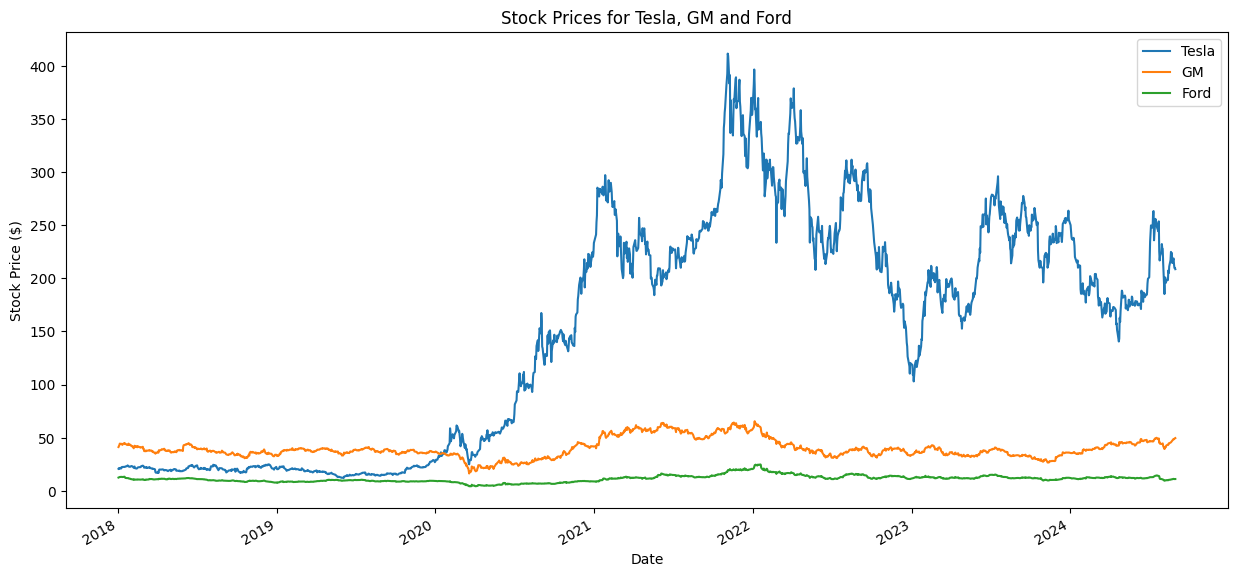

In [188]:
tesla['Open'].plot(label='Tesla',figsize=(15,7))
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.ylabel('Stock Price ($)')
plt.title('Stock Prices for Tesla, GM and Ford')
plt.legend()

Traded Volume for TESLA, GM AND FORD

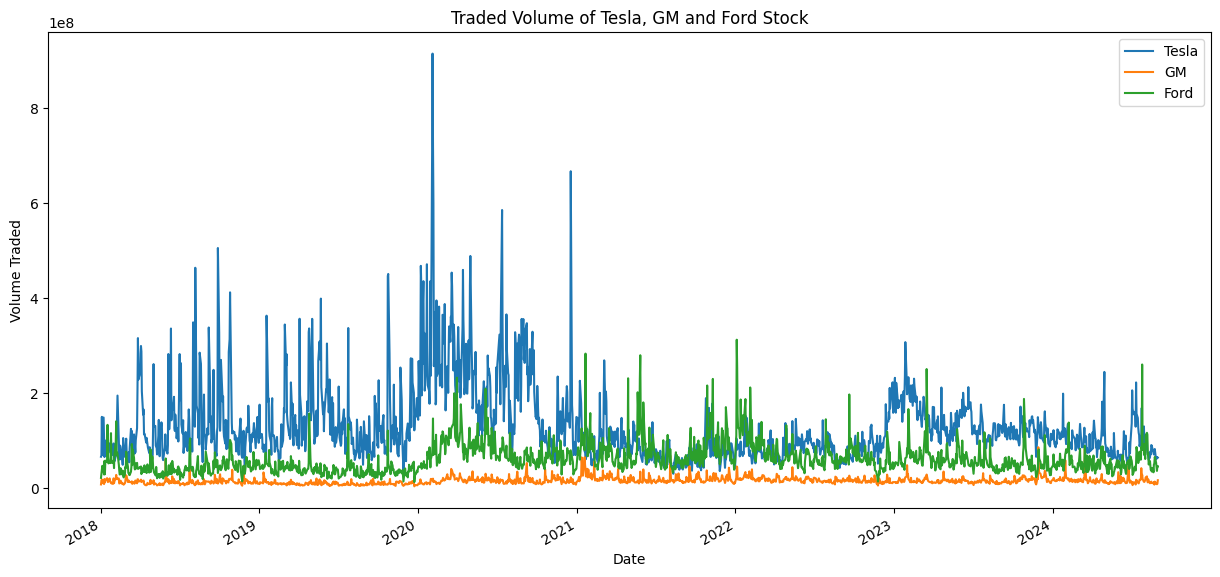

In [189]:
tesla['Volume'].plot(label='Tesla', figsize=(15,7))
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')
plt.ylabel('Volume Traded')
plt.title('Traded Volume of Tesla, GM and Ford Stock')
plt.legend()


Investigating trading volume spike that occured on 4th Jan 2022

In [190]:
ford.iloc[[ford['Volume'].argmax()]]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-04,22.52,24.559999,22.42,24.309999,20.182302,311645200


<Axes: xlabel='Date'>

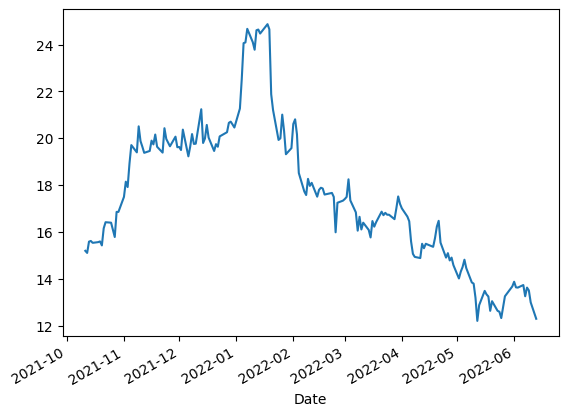

In [191]:
ford.iloc[950:1120]['Open'].plot()

Total Traded Dollar Value ($)

In [192]:
tesla['Total Traded'] = tesla['Open'] * tesla['Volume']
gm['Total Traded'] = gm['Open'] * gm['Volume']
ford['Total Traded'] = ford['Open'] * ford['Volume']

In [193]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded
Date,,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000,1.357886e+09
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500,1.451401e+09
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500,3.111899e+09
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000,1.453666e+09
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000,3.115571e+09


In [194]:
gm.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded
Date,,,,,,,
2018-01-02,41.240002,41.869999,41.150002,41.799999,37.197289,6934600,2.859829e+08
2018-01-03,42.209999,42.950001,42.200001,42.820000,38.104973,14591600,6.159114e+08
2018-01-04,43.090000,44.250000,43.009998,44.139999,39.279629,17298700,7.454010e+08
2018-01-05,44.500000,44.639999,43.959999,44.009998,39.163940,9643300,4.291268e+08
2018-01-08,44.040001,44.590000,43.520000,44.220001,39.350815,13099600,5.769064e+08


In [195]:
ford.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded
Date,,,,,,,
2018-01-02,12.52,12.66,12.50,12.66,8.995987,20773300,2.600817e+08
2018-01-03,12.68,12.80,12.67,12.76,9.067048,29765600,3.774278e+08
2018-01-04,12.78,13.04,12.77,12.98,9.223374,37478200,4.789714e+08
2018-01-05,13.06,13.22,13.04,13.20,9.379702,46121900,6.023520e+08
2018-01-08,13.21,13.22,13.11,13.15,9.344173,33828300,4.468718e+08


Text(0.5, 1.0, 'Total Traded Volume')

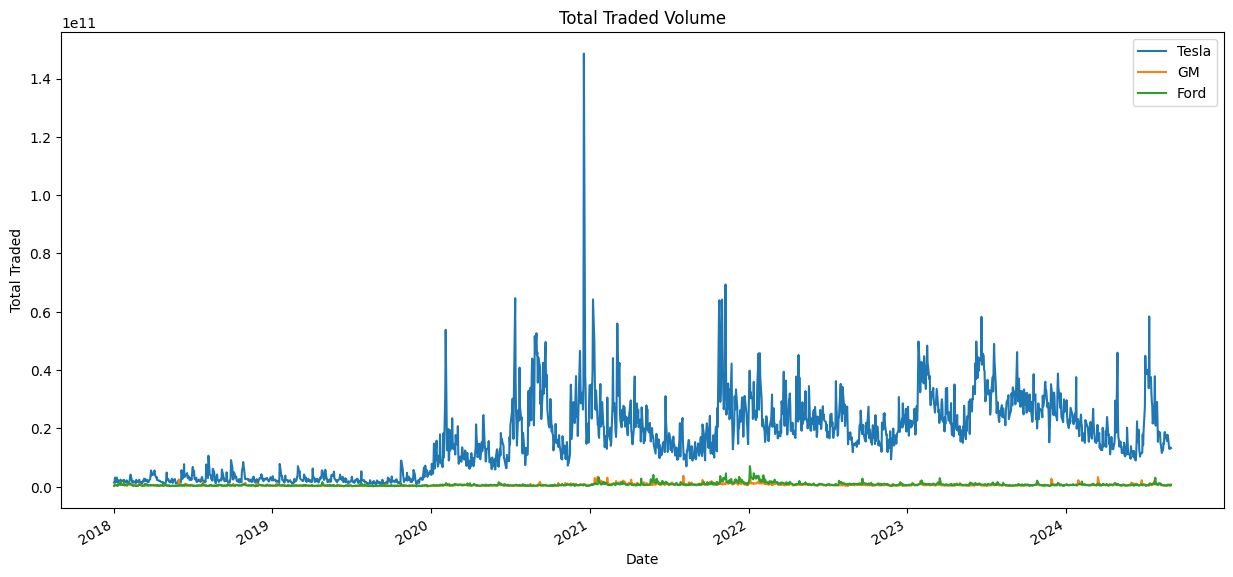

In [196]:
tesla['Total Traded'].plot(label='Tesla', figsize=(15,7))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend()
plt.ylabel('Total Traded')
plt.title('Total Traded Volume')


In [197]:
tesla['Total Traded'].argmax()

np.int64(747)

In [198]:
tesla.iloc[[tesla['Total Traded'].argmax()]]

,Open,High,Low,Close,Adj Close,Volume,Total Traded
Date,,,,,,,
2020-12-18,222.96666,231.666672,209.513336,231.666672,231.666672,666378600,1.485802e+11


Moving Averages

Text(0.5, 1.0, 'Moving Averages: GM')

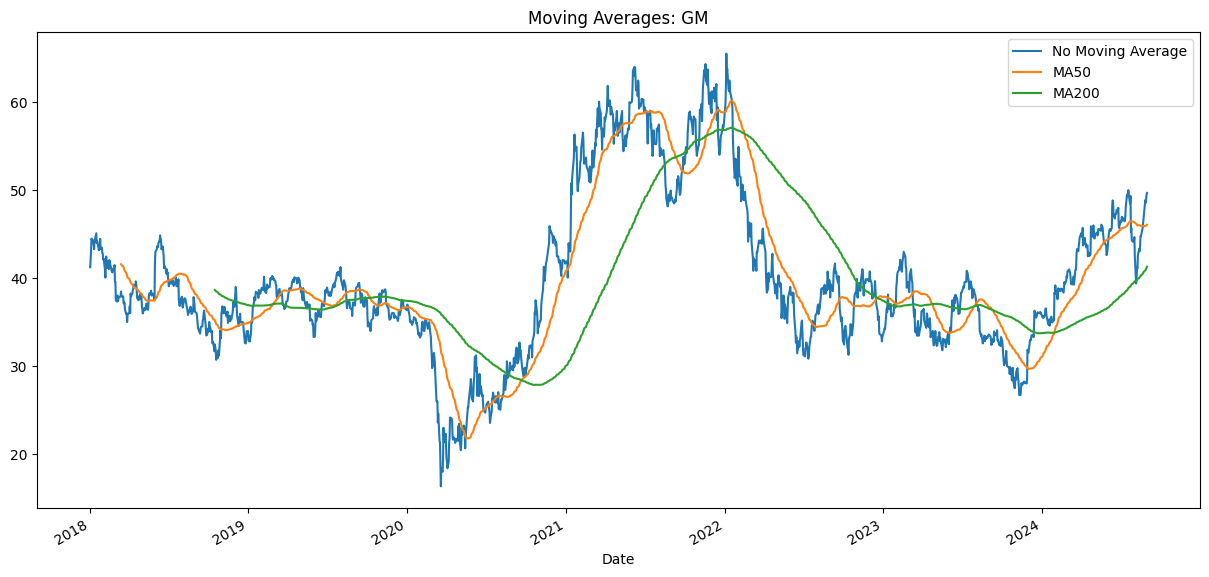

In [199]:
gm['Open'].plot(label='No Moving Average', figsize=(15,7))
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA50'].plot(label='MA50')
gm['MA200'] = gm['Open'].rolling(200).mean()
gm['MA200'].plot(label='MA200')
plt.legend()
plt.title('Moving Averages: GM')


Text(0.5, 1.0, 'Moving Averages: FORD')

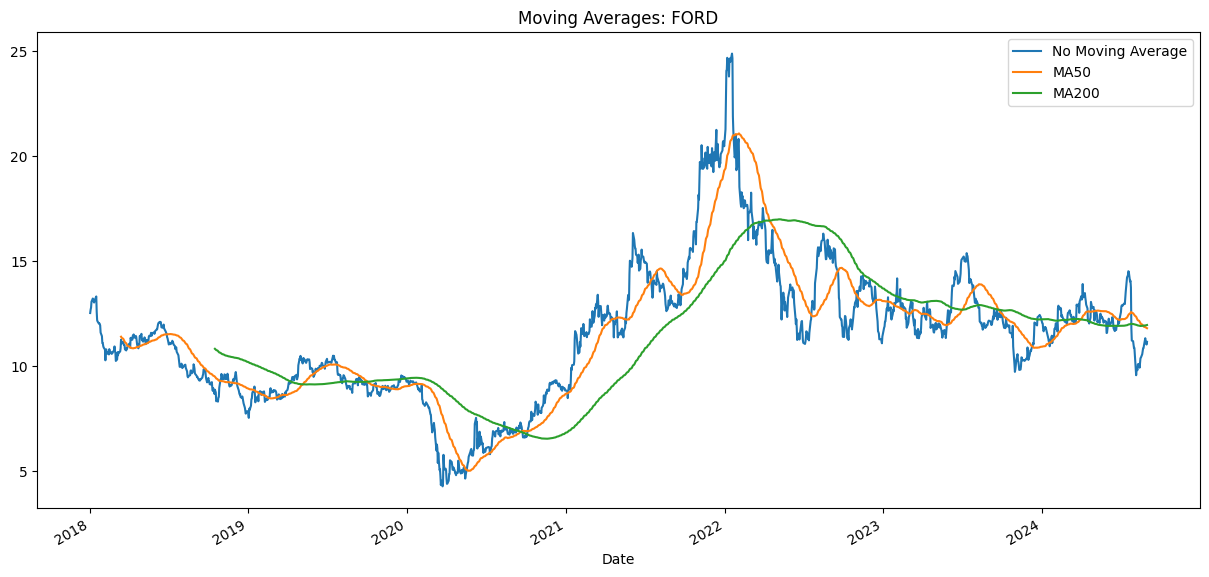

In [200]:
ford['Open'].plot(label='No Moving Average', figsize=(15,7))
ford['MA50'] = ford['Open'].rolling(50).mean()
ford['MA50'].plot(label='MA50')
ford['MA200'] = ford['Open'].rolling(200).mean()
ford['MA200'].plot(label='MA200')
plt.legend()
plt.title('Moving Averages: FORD')

Text(0.5, 1.0, 'Moving Averages: TESLA')

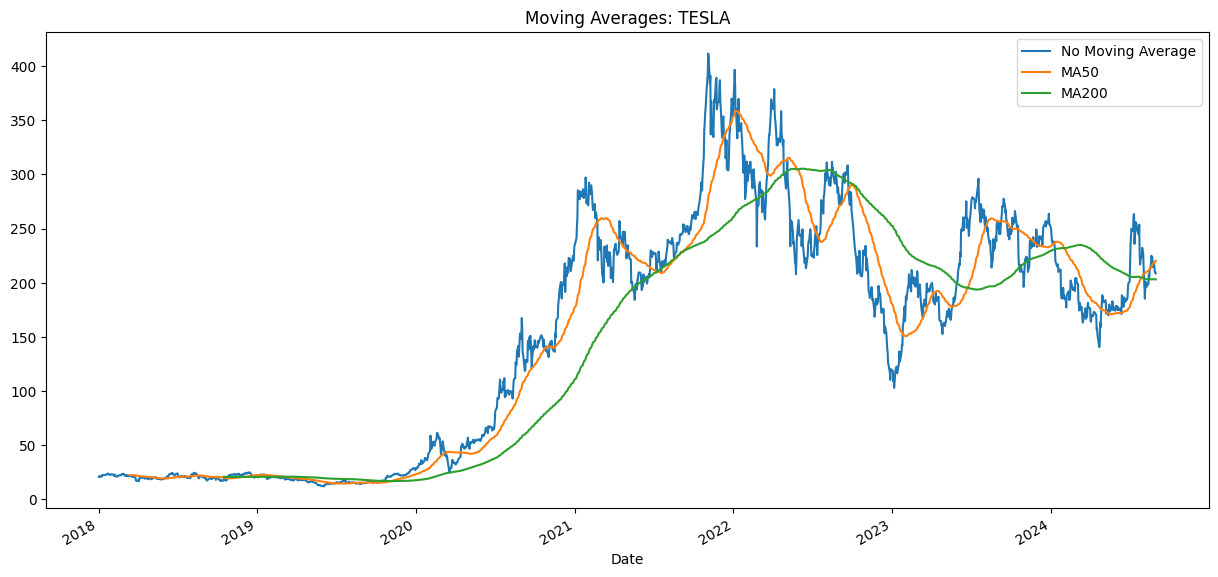

In [201]:
tesla['Open'].plot(label='No Moving Average', figsize=(15,7))
tesla['MA50'] = tesla['Open'].rolling(50).mean()
tesla['MA50'].plot(label='MA50')
tesla['MA200'] = tesla['Open'].rolling(200).mean()
tesla['MA200'].plot(label='MA200')
plt.legend()
plt.title('Moving Averages: TESLA')

Correlation and Scatter Matrix

In [202]:
from pandas.plotting import scatter_matrix
import pandas as pd


array([[<Axes: xlabel='Tesla Open', ylabel='Tesla Open'>,
        <Axes: xlabel='GM Open', ylabel='Tesla Open'>,
        <Axes: xlabel='Ford Open', ylabel='Tesla Open'>],
       [<Axes: xlabel='Tesla Open', ylabel='GM Open'>,
        <Axes: xlabel='GM Open', ylabel='GM Open'>,
        <Axes: xlabel='Ford Open', ylabel='GM Open'>],
       [<Axes: xlabel='Tesla Open', ylabel='Ford Open'>,
        <Axes: xlabel='GM Open', ylabel='Ford Open'>,
        <Axes: xlabel='Ford Open', ylabel='Ford Open'>]], dtype=object)

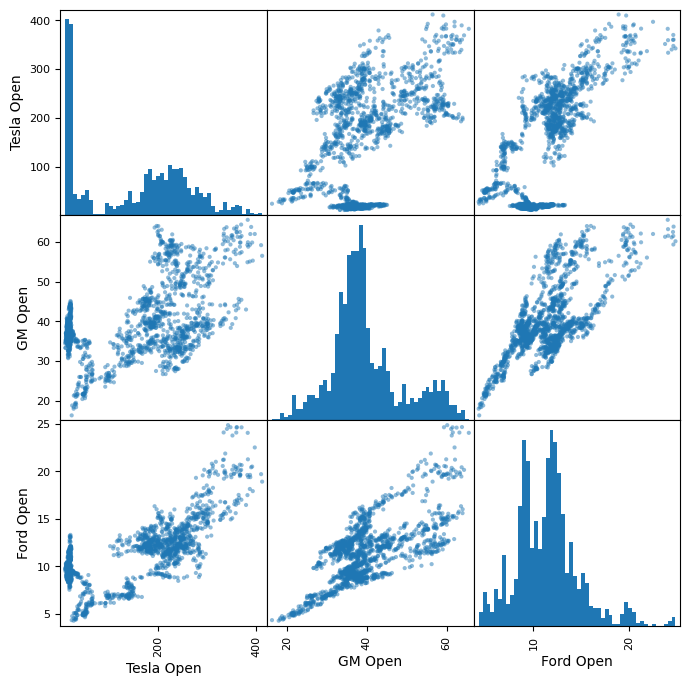

In [203]:
car_comp = pd.concat([tesla['Open'], gm['Open'], ford['Open']], axis = 1)
car_comp.columns = ['Tesla Open', 'GM Open', 'Ford Open']
scatter_matrix(car_comp, figsize=(8,8), hist_kwds={'bins' :50})

Candlestick Charts

c:\Users\shira\AppData\Local\Programs\Python\Python311\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


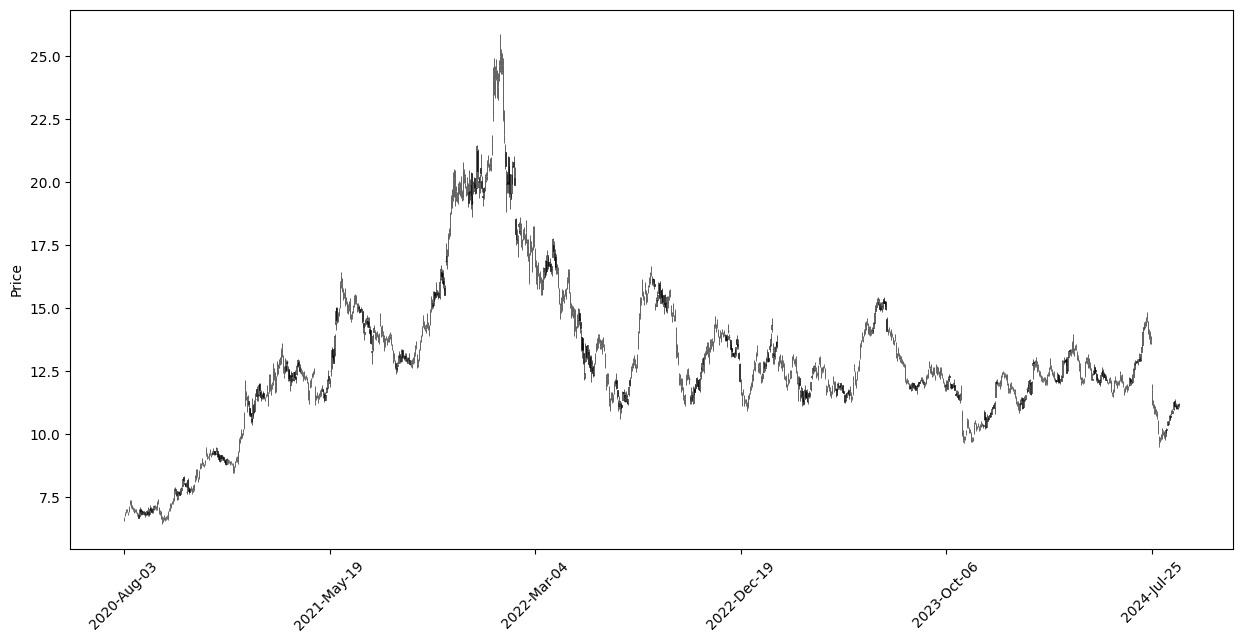

In [204]:
import mplfinance as mpf
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY
import matplotlib.pyplot as plt

ford_reset = ford.loc['2020-08' : '2024-09'].reset_index()

ford_reset['Date'] = pd.to_datetime(ford_reset['Date']) 

ford_reset.set_index('Date', inplace=True)

ford_reset['date_ax'] = ford_reset.index.map(date2num) # Use the index directly
ford_values = [tuple(vals) for vals in ford_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values] 

mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dayformatter = DateFormatter('%d')


fig, ax = plt.subplots(figsize=(15, 7))


mpf.plot(ford_reset, type = 'candle', ax = ax)
plt.show()

Daily Percentage Change rt = [(pt/pt-1)-1] - VOLATILITY

In [205]:
tesla['returns'] = (tesla['Close']/tesla['Close'].shift(1)) -1
tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000,1.357886e+09,NaN,NaN,NaN
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500,1.451401e+09,NaN,NaN,-0.010233
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500,3.111899e+09,NaN,NaN,-0.008290
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000,1.453666e+09,NaN,NaN,0.006230
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000,3.115571e+09,NaN,NaN,0.062638


In [206]:
ford['returns'] = (ford['Close']/ford['Close'].shift(1)) -1
ford.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2018-01-02,12.52,12.66,12.50,12.66,8.995987,20773300,2.600817e+08,NaN,NaN,NaN
2018-01-03,12.68,12.80,12.67,12.76,9.067048,29765600,3.774278e+08,NaN,NaN,0.007899
2018-01-04,12.78,13.04,12.77,12.98,9.223374,37478200,4.789714e+08,NaN,NaN,0.017241
2018-01-05,13.06,13.22,13.04,13.20,9.379702,46121900,6.023520e+08,NaN,NaN,0.016949
2018-01-08,13.21,13.22,13.11,13.15,9.344173,33828300,4.468718e+08,NaN,NaN,-0.003788


In [207]:
gm['returns'] = (gm['Close']/gm['Close'].shift(1)) -1
gm.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2018-01-02,41.240002,41.869999,41.150002,41.799999,37.197289,6934600,2.859829e+08,NaN,NaN,NaN
2018-01-03,42.209999,42.950001,42.200001,42.820000,38.104973,14591600,6.159114e+08,NaN,NaN,0.024402
2018-01-04,43.090000,44.250000,43.009998,44.139999,39.279629,17298700,7.454010e+08,NaN,NaN,0.030827
2018-01-05,44.500000,44.639999,43.959999,44.009998,39.163940,9643300,4.291268e+08,NaN,NaN,-0.002945
2018-01-08,44.040001,44.590000,43.520000,44.220001,39.350815,13099600,5.769064e+08,NaN,NaN,0.004772


<Axes: >

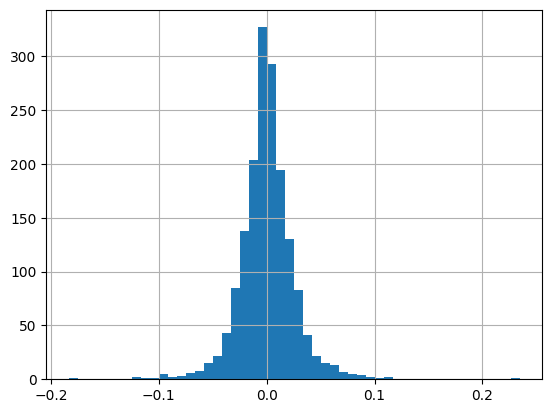

In [208]:
ford['returns'].hist(bins=50)

<Axes: >

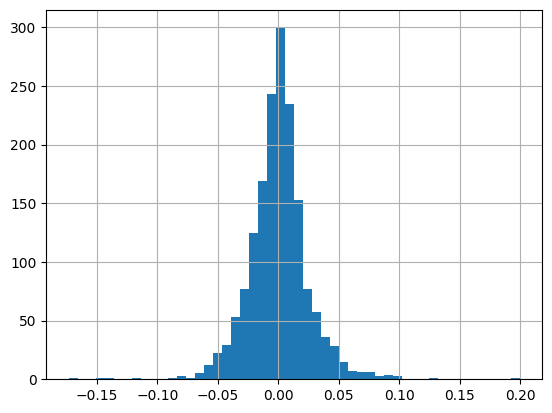

In [209]:
gm['returns'].hist(bins=50)

<Axes: >

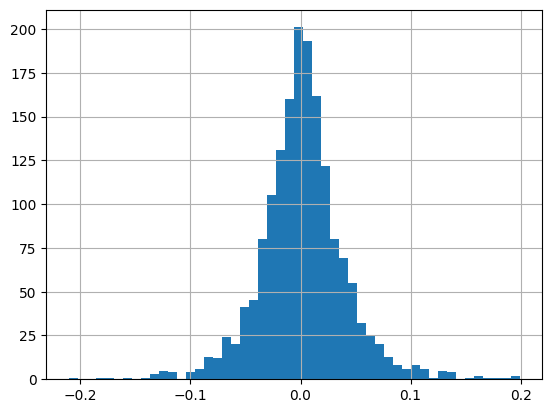

In [210]:
tesla['returns'].hist(bins=50)

Volatility Histogram

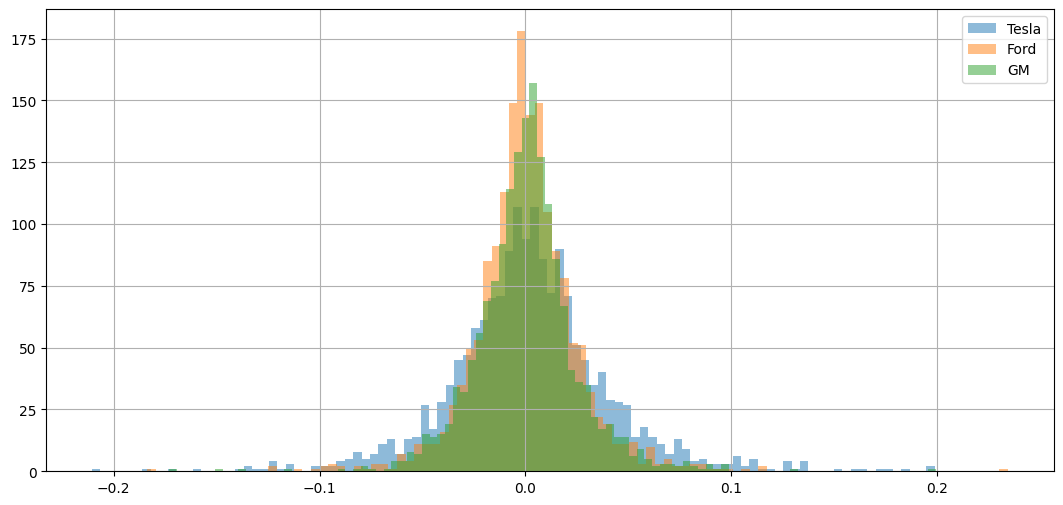

In [211]:
tesla['returns'].hist(bins = 100, label='Tesla', alpha=0.5, figsize = (13,6))
ford['returns'].hist(bins = 100, label='Ford', alpha=0.5)
gm['returns'].hist(bins = 100, label='GM', alpha=0.5)
plt.legend()

Kernel Density Esitmate

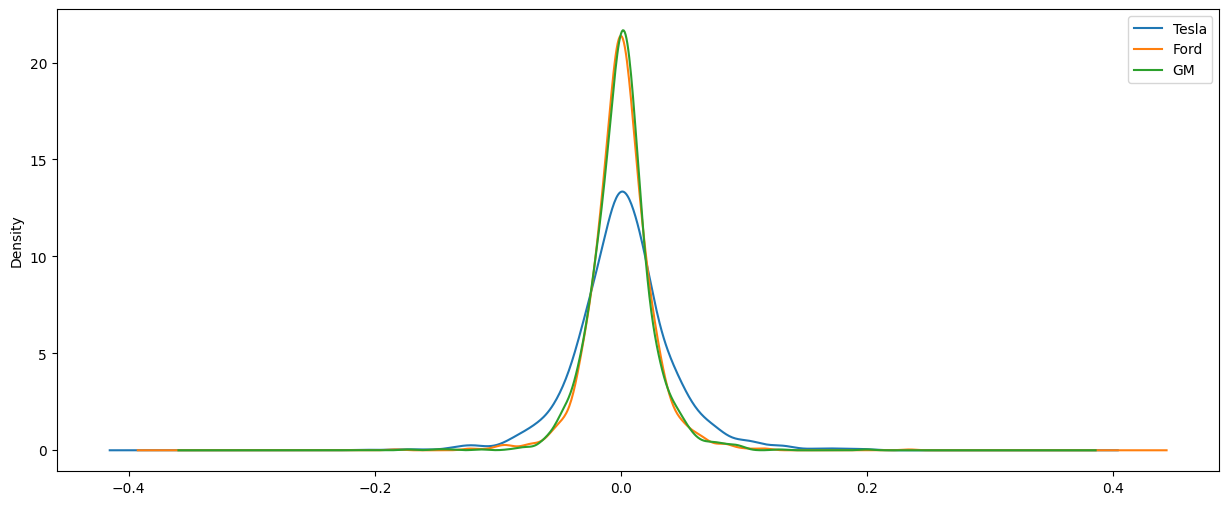

In [212]:
tesla['returns'].plot(kind='kde' , label ='Tesla', figsize=(15,6))
ford['returns'].plot(kind='kde' , label ='Ford')
gm['returns'].plot(kind='kde' , label ='GM')
plt.legend()

Box Plots

<Axes: >

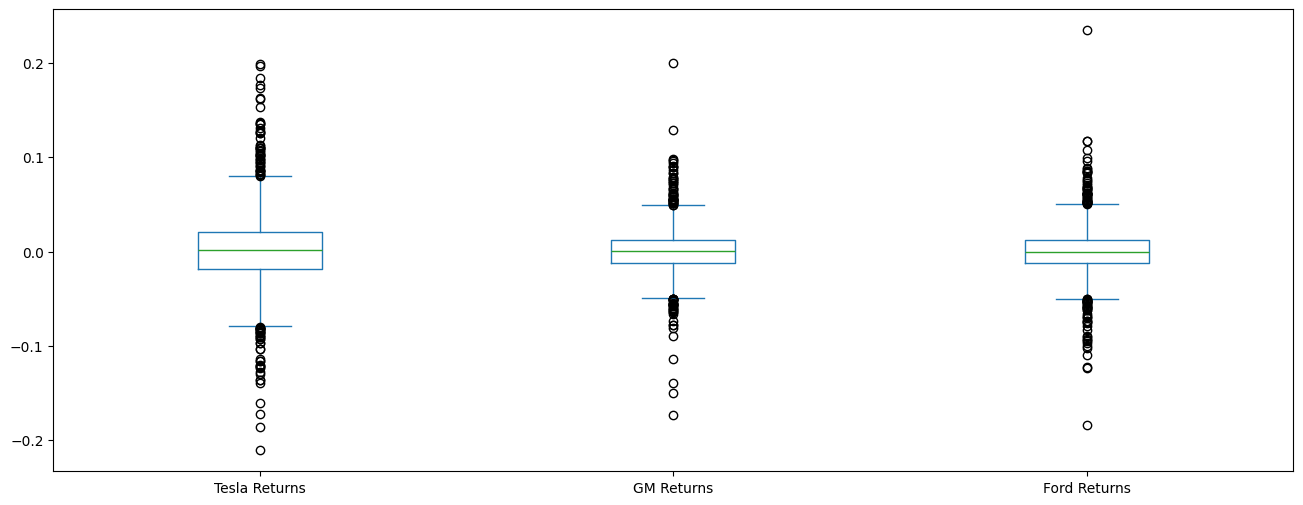

In [213]:
box_df = pd.concat([tesla['returns'], gm['returns'], ford['returns']], axis = 1)
box_df.columns=['Tesla Returns', 'GM Returns', 'Ford Returns']
box_df.plot(kind='box', figsize=(16,6))

Any Corelation between the daily returns of the stock of all 3 companies?

array([[<Axes: xlabel='Tesla Returns', ylabel='Tesla Returns'>,
        <Axes: xlabel='GM Returns', ylabel='Tesla Returns'>,
        <Axes: xlabel='Ford Returns', ylabel='Tesla Returns'>],
       [<Axes: xlabel='Tesla Returns', ylabel='GM Returns'>,
        <Axes: xlabel='GM Returns', ylabel='GM Returns'>,
        <Axes: xlabel='Ford Returns', ylabel='GM Returns'>],
       [<Axes: xlabel='Tesla Returns', ylabel='Ford Returns'>,
        <Axes: xlabel='GM Returns', ylabel='Ford Returns'>,
        <Axes: xlabel='Ford Returns', ylabel='Ford Returns'>]],
      dtype=object)

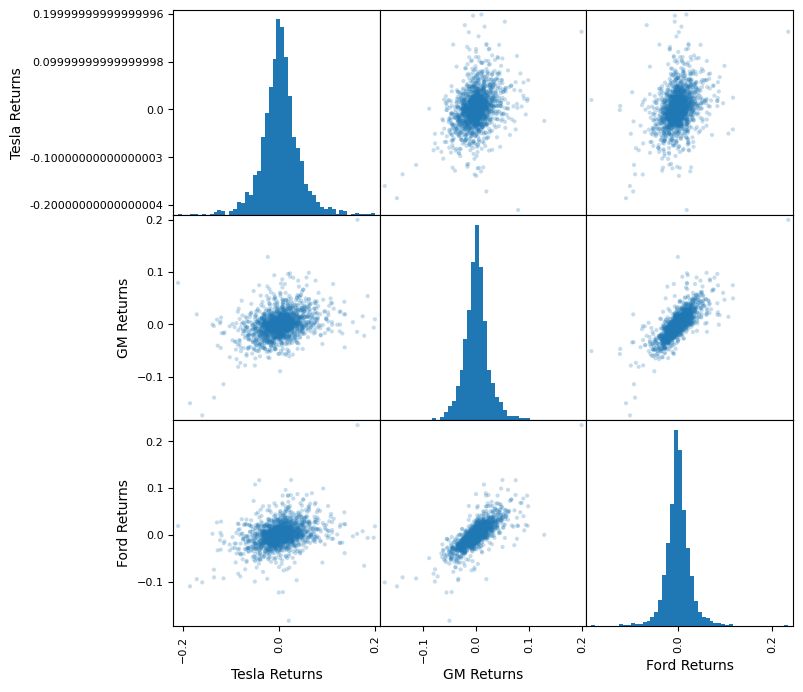

In [214]:
scatter_matrix(box_df,figsize=(8,8),hist_kwds={'bins' :50}, alpha = 0.25)


Cumulative Return

In [215]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()
tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000,1.357886e+09,NaN,NaN,NaN,NaN
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500,1.451401e+09,NaN,NaN,-0.010233,0.989767
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500,3.111899e+09,NaN,NaN,-0.008290,0.981562
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000,1.453666e+09,NaN,NaN,0.006230,0.987677
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000,3.115571e+09,NaN,NaN,0.062638,1.049543


In [216]:
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()
ford.head()


,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2018-01-02,12.52,12.66,12.50,12.66,8.995987,20773300,2.600817e+08,NaN,NaN,NaN,NaN
2018-01-03,12.68,12.80,12.67,12.76,9.067048,29765600,3.774278e+08,NaN,NaN,0.007899,1.007899
2018-01-04,12.78,13.04,12.77,12.98,9.223374,37478200,4.789714e+08,NaN,NaN,0.017241,1.025276
2018-01-05,13.06,13.22,13.04,13.20,9.379702,46121900,6.023520e+08,NaN,NaN,0.016949,1.042654
2018-01-08,13.21,13.22,13.11,13.15,9.344173,33828300,4.468718e+08,NaN,NaN,-0.003788,1.038705


In [217]:
gm.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2018-01-02,41.240002,41.869999,41.150002,41.799999,37.197289,6934600,2.859829e+08,NaN,NaN,NaN,NaN
2018-01-03,42.209999,42.950001,42.200001,42.820000,38.104973,14591600,6.159114e+08,NaN,NaN,0.024402,1.024402
2018-01-04,43.090000,44.250000,43.009998,44.139999,39.279629,17298700,7.454010e+08,NaN,NaN,0.030827,1.055981
2018-01-05,44.500000,44.639999,43.959999,44.009998,39.163940,9643300,4.291268e+08,NaN,NaN,-0.002945,1.052871
2018-01-08,44.040001,44.590000,43.520000,44.220001,39.350815,13099600,5.769064e+08,NaN,NaN,0.004772,1.057895


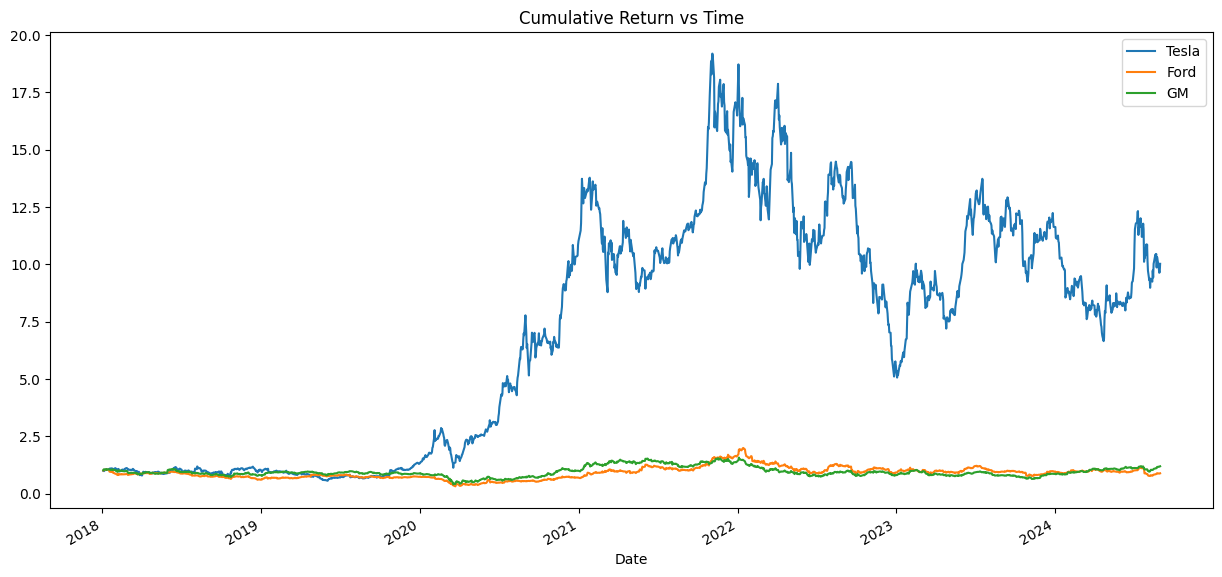

In [218]:
tesla['Cumulative Return'].plot(label='Tesla' ,figsize=(15,7))
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.title('Cumulative Return vs Time')
plt.legend()

In [219]:
tesla.to_csv('Tesla_Stock_final.csv')
ford.to_csv('Ford_Stock_final.csv')
gm.to_csv('GM_Stock_final.csv')